<a href="https://colab.research.google.com/github/dani1974/DanielaRosasPUC/blob/main/MVP_Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOME : DANIELA ROSAS**

**SPRINT1 - MVP1**
.

.

.

.

.

### **Classificação dos Níveis de Obesidade**

citacão do dado: @misc{sujith k mandala_2023,
	title={Obesity Classification Dataset},

	url={https://www.kaggle.com/dsv/5723036},

	DOI={10.34740/KAGGLE/DSV/5723036},

	publisher={Kaggle},author={Sujith K Mandala},year={2023}}




### **1-Definição do problema**


**Objetivo**
ETL, análise estatistica da base de dados e classificar corretamente o nível de obesidade

**1.1- Qual é a descrição do problema?**

R:  a partir dod atributos de Peso, Idade, Gênero, Histórioco, Idade e IMC, classsificar o tipo de obesidade

**1.2- Este é um problema de aprendizado supervisionado ou não supervisionado?**

R: Supervisioado

**1.3- Que premissas ou hipóteses você tem sobre o problema?**

R:É possível que a idade, o sexo, a altura e o peso também sejam fatores importantes na determinação da classificação de obesidade?

**1.4- Que restrições ou condições foram impostas para selecionar os dados?**

R: Foi selecionadas as 5 primeiras colunas do dataset de 16 atributos e 1 target,com a finalidade de não comprometer o processamento da classificação

**1.5- Defina cada um dos atributos do dataset.**
The dataset contains the following columns:

ID: identificador

Idade:idade do individuo

Genero: Genero do individuo (Male =2/Female=1)

Altura: altura do individuo em cm

Peso: Weight of the individual in kilograms - (peso/altura^2)

IMC: Indicie de massa coreporea do individuo

Label: Obesity classification - foi inserido caracteres numéricos para a classificação

Obesity_Type_III - 6

Obesity_Type_II - 5

Obesity_Type_I - 4

Overweight_Level_II - 3

Overweight_Level_I - 2

Normal_Weight - 1

Insufficient_Weight - 0

## **2-Carga de Dados**

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/dani1974/Obesidade/main/obesidade/ObesityDataSet.csv"

# Lê o arquivo
df = pd.read_csv(url, delimiter=',')

df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### **3-Análise de dados - Estatísticas descritivas:**

**Objetivo: Entender as relações de peso,altura,idade,histórico e sexo no diagnostico de obesidade.**

**Estatísticas descritivas:**

**3.1- Quantos atributos e instâncias existem?**
R: 16, foram retirados 10 atributos da amostra, com a finalidade de facilitar a etapa de classificação

**3.2- Quais são os tipos de dados dos atributos?**
Multivarido

**3.3- Verifique as primeiras linhas do dataset. Algo chama a atenção?**
R: Sim, apesar da base já estar praticamente tratada, não tendo presença de valores faltantes ou inconsistentes, houve a necessidade de trocar alguns informações qualitativas nominais para ordinais ou binárias.



In [7]:
df.shape
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
df1= df.replace({'Female': '1', 'Male': '2','yes': '1','no':'0'}, inplace=True)


In [11]:
# Exclui as colunas de 5 a 15
df1 = df.drop(df.columns[5:16], axis=1)

# Exibe o DataFrame resultante
print(df1)

     Gender        Age    Height      Weight family_history_with_overweight  \
0         1  21.000000  1.620000   64.000000                              1   
1         1  21.000000  1.520000   56.000000                              1   
2         2  23.000000  1.800000   77.000000                              1   
3         2  27.000000  1.800000   87.000000                              0   
4         2  22.000000  1.780000   89.800000                              0   
...     ...        ...       ...         ...                            ...   
2106      1  20.976842  1.710730  131.408528                              1   
2107      1  21.982942  1.748584  133.742943                              1   
2108      1  22.524036  1.752206  133.689352                              1   
2109      1  24.361936  1.739450  133.346641                              1   
2110      1  23.664709  1.738836  133.472641                              1   

               NObeyesdad  
0           Normal_Weig

**Converter os nomes dos atributos escolhidos para o Português e calcular o IMC**

In [12]:
# renomeando as colunas

df2 = df1.rename(columns={'Gender': 'Sexo','Age': 'Idade','Height': 'Altura','Weight': 'Peso','family_history_with_overweight': 'Historico','NObeyesdad': 'Target'})
df2.head()


,Sexo,Idade,Altura,Peso,Historico,Target
0,1,21.0,1.62,64.0,1,Normal_Weight
1,1,21.0,1.52,56.0,1,Normal_Weight
2,2,23.0,1.80,77.0,1,Normal_Weight
3,2,27.0,1.80,87.0,0,Overweight_Level_I
4,2,22.0,1.78,89.8,0,Overweight_Level_II


In [13]:
#calculando o IMC


df2 = df2.assign(IMC= df2['Peso']/(df2['Altura']** 2))
df2 = df2.reindex(columns=[ 'Sexo', 'Idade', 'Altura', 'Peso', 'IMC', 'Historico', 'Target'])

df2

,Sexo,Idade,Altura,Peso,IMC,Historico,Target
0,1,21.000000,1.620000,64.000000,24.386526,1,Normal_Weight
1,1,21.000000,1.520000,56.000000,24.238227,1,Normal_Weight
2,2,23.000000,1.800000,77.000000,23.765432,1,Normal_Weight
3,2,27.000000,1.800000,87.000000,26.851852,0,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,28.342381,0,Overweight_Level_II
...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,44.901475,1,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,43.741923,1,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,43.543817,1,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,44.071535,1,Obesity_Type_III


**3.4- Há valores faltantes, discrepantes ou inconsistentes?**
R: Não

Sexo         0
Idade        0
Altura       0
Peso         0
Historico    0
Target       0



In [14]:
# verificando nulls no dataset
df2.isnull().sum()


Sexo         0
Idade        0
Altura       0
Peso         0
IMC          0
Historico    0
Target       0
dtype: int64

**3.5- Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?**

R:  O dados não apresenta dados falatantes ou incocnsistentes.
Apresenta a amplitude alta desvio padrão da idade, peso e IMC, sendo utilizado a mediana e não a média.
A amostra tem uma conscentração dos dados de idade entorno de 22 anos, altura entorno de 1.70,  Peso entorno de 83 e IMC com 28

In [17]:
# Item Resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
resumo_est= df2.describe()

resumo_est

,Idade,Altura,Peso,IMC
count,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,29.700159
std,6.345968,0.093305,26.191172,8.011337
min,14.000000,1.450000,39.000000,12.998685
25%,19.947192,1.630000,65.473343,24.325802
50%,22.777890,1.700499,83.000000,28.719089
75%,26.000000,1.768464,107.430682,36.016501
max,61.000000,1.980000,173.000000,50.811753


In [23]:
#mediana dos dados

from statistics import median
mediana = df2.median()
mediana


Sexo          2.000000
Idade        22.777890
Altura        1.700499
Peso         83.000000
IMC          28.719089
Historico     1.000000
dtype: float64

In [ ]:
df2.shape

(2111, 7)

### **Análise de dados - Visualizações:**

**4 - Visualizações:**


4.1- Verifique a distribuição de cada atributo. O que você percebe?

R:
**Atributo Idade** - Apresenta uma distribuição assimetria à direita com. Isso nos indica maior concentração dos dados entorno de 18 a 26 anos. apresenta outliers entre as idades mais avançadas entorno de 50 e 60 anos

**Atributo Altura** - Distribuição normal entorno de 1,70

**Atributo Peso** - Distribuição assimétrica a direito com concentração entorno dos números entorno de 83

**Atributo IMC** - Distribuição normal entorno de 28



### **Visualizações Unimodais**

histograma para cada atributo do dataset



OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.



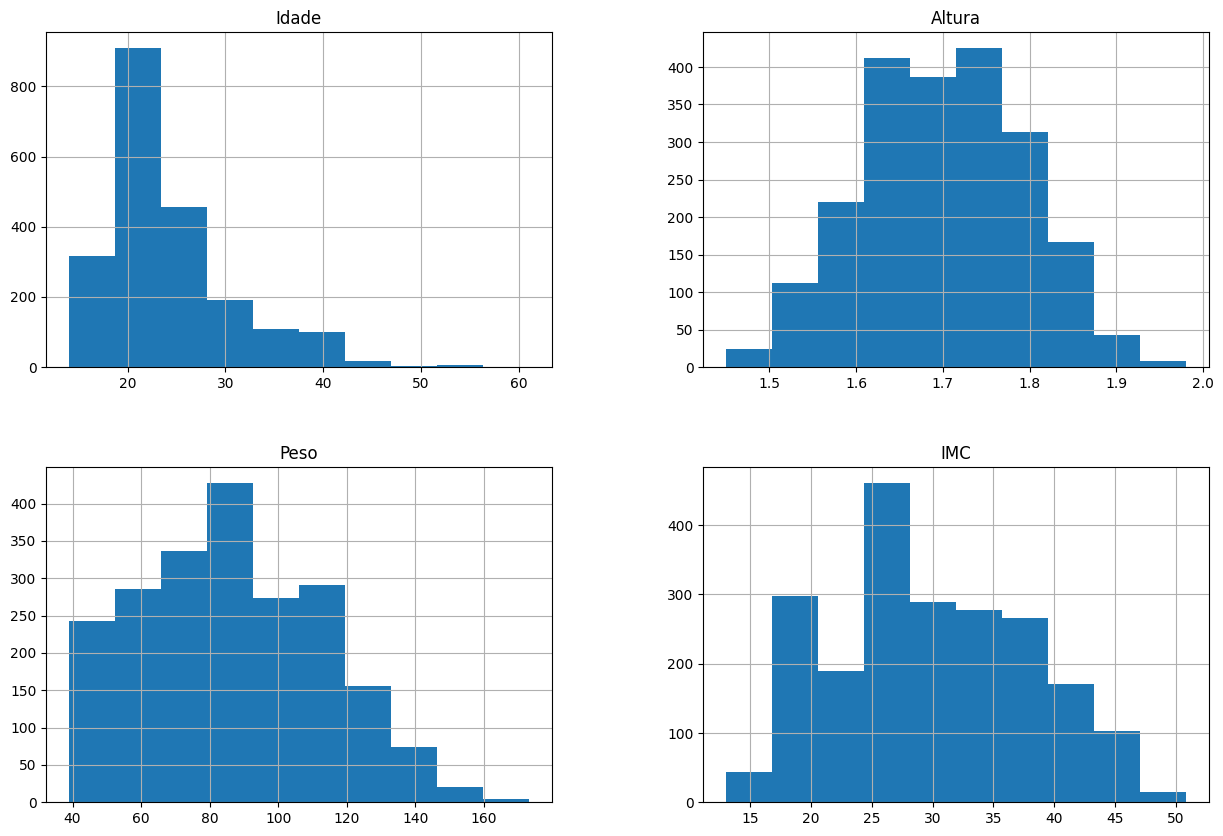

In [25]:
# Histograma
df2.hist(figsize = (15,10))
plt.show()

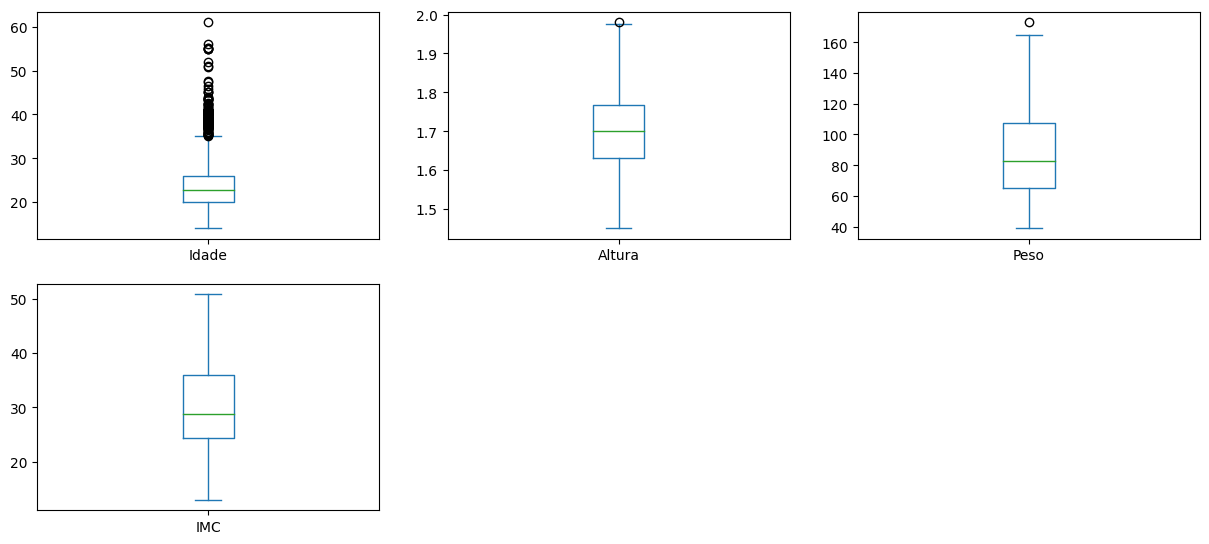

In [26]:

# Boxplot
df2.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()



**4.2- Se for um problema de classificação, verifique a distribuição de frequência das classes. O que você percebe?**
Dica: esta etapa pode indicar a possível necessidade futura de balanceamento de classes.

R: Como ilustrado no gráfico abaixo, a a maior frequencia seria a classe Obesidade tipo 1 , em 2º Obesidade tipo 3 e  em 3º lugar a obrsidade tipo 2

In [27]:
# Observa-se que a maior frequencia esta no tipo de obesidade 1,3,2

resumo = df2['Target'].value_counts()

resumo

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: Target, dtype: int64

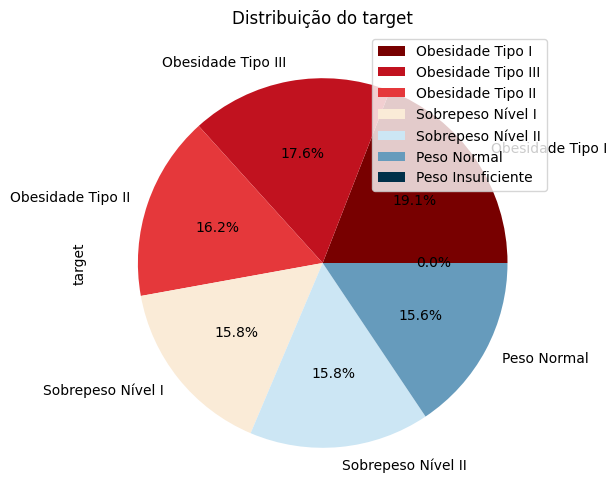

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Crie um dataframe de exemplo
df = pd.DataFrame({'target': [351, 324, 297, 290, 290, 287, 0]}, index=['Obesidade Tipo I', 'Obesidade Tipo III', 'Obesidade Tipo II', 'Sobrepeso Nível I', 'Sobrepeso Nível II', 'Peso Normal', 'Peso Insuficiente'])

# Defina as cores
colors = ["#780000", "#C1121F", "#e5383b", "#FAEBD7","#cce6f4","#669BBC","#003049"]

# Plote o gráfico de pizza
df.plot.pie(y='target', figsize=(6,6), title="Distribuição do target", autopct="%0.1f%%", colors=colors)

# Mostre o gráfico
plt.show()


**4.3- Analise os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados.**

Olhando os atributos individualmente:

**Gênero:** a amostra é bem distribuída com 51% Feminino e 49% masculino

**A obesidade em relação ao gênero:** Maior concentração do gênero masculino na obesidade tipo 2 e no gênero feminino na obesidade tipo 3
O gráfico de bolha ilustra a relação da idade com a obesidade, não apontando uma relação expressiva

**Na matriz de correlação**
Observe que o peso e o IMC estão fortemente correlacionados positivamente com a obesidade. Isso indica que à medida que o peso e o IMC aumentam, a probabilidade do indivíduo ser obeso também aumenta.

Parece que a incorporação de recursos polinomiais produz alguns novos recursos com fortes correlações com a variável alvo.


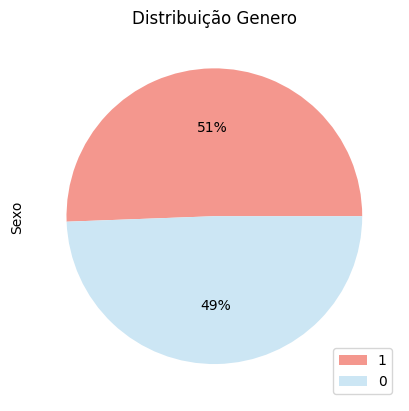

In [29]:
df2["Sexo"].value_counts().plot.pie(title = "Distribuição Genero", labels=["", ""], autopct="%1.f%%", colors=["#f4978e", "#cce6f4"])
labels=["1", "0"]
plt.legend(labels, loc=4)
plt.show()

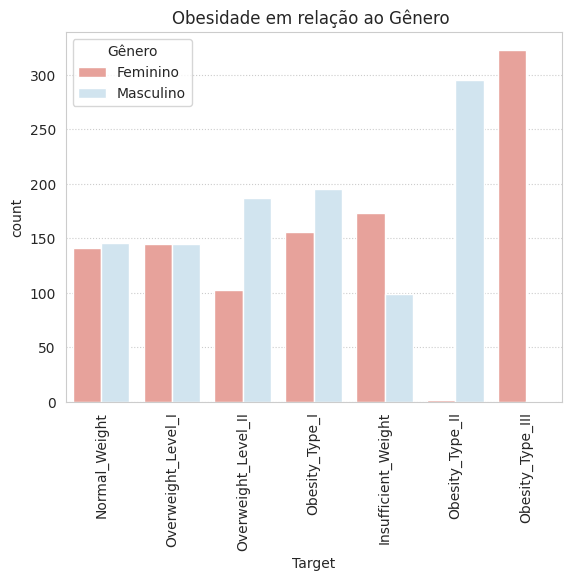

In [30]:
sns.set_style("whitegrid", {"axes.grid": True, "grid.linestyle": ":"})
sns.countplot(data=df2, x="Target", hue="Sexo", palette=["#f4978e", "#cce6f4"])
plt.title("Obesidade em relação ao Gênero ")
plt.xticks(rotation=90)

# Mudar o título e os rótulos da legenda
plt.legend(title="Gênero", labels=["Feminino", "Masculino"])

plt.show()

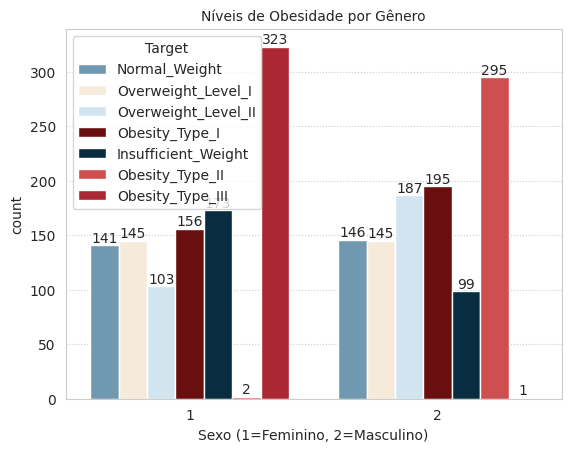

In [31]:
sns.set_style("whitegrid", {"axes.grid": True, "grid.linestyle": ":"})
ax = sns.countplot(x=df2["Sexo"], hue=df2['Target'], palette=["#669bbc","#faebd7","#cce6f4","#780000","#003049","#e5383b","#C1121F"])
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Níveis de Obesidade por Gênero", size=10)

# Change the x-axis label
ax.set_xlabel("Sexo (1=Feminino, 2=Masculino)")

plt.show()


In [38]:
import plotly.express as px
import pandas as pd

# Crie o gráfico de bolha
fig = px.scatter(df2, x="Altura", y="Peso", size="Idade", color="IMC", color_discrete_sequence=["#C1121F", "#cce6f4"])

# Adicione legendas
fig.update_layout(
    title="Gráfico de Bolha - Peso x Altura ",
    xaxis_title="Altura",
    yaxis_title="Peso",
    legend_title="IMC"
)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray', linecolor='black', linewidth=1, mirror=True),
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray', linecolor='black', linewidth=1, mirror=True),
    showlegend=True,
    legend=dict(bgcolor='rgba(0,0,0,0)', bordercolor='black', borderwidth=1)
)
# Exiba o gráfico
fig.show()

### **Visualizações Multimodais**

Ao visualizar as correlações entre os atributos através da matriz de correlação

In [39]:
df2.groupby('Historico').size()


Historico
0     385
1    1726
dtype: int64

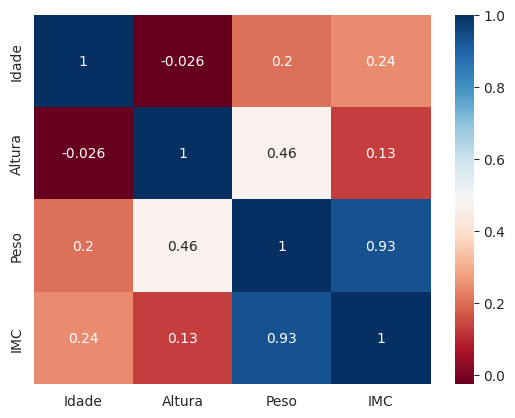

In [40]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(df2.corr(), annot=True, cmap='RdBu');

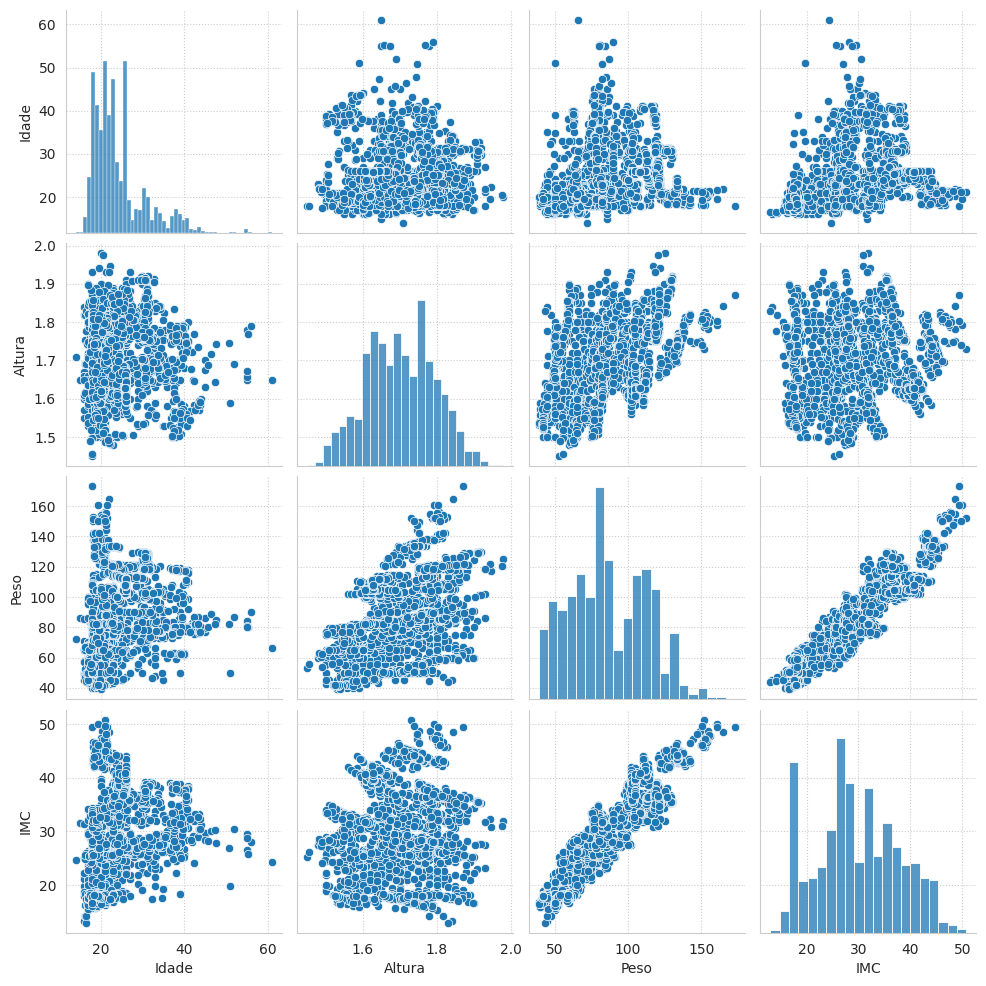

In [41]:

# Scatter Plot com Seaborn - Variação 1

sns.pairplot(df2)

### **5-Pré-processamento de dados:**


**Objetivo: realizar operações de limpeza, tratamento e preparação dos dados.**

5.1- Verifique quais operações de pré-processamento podem ser interessantes para o seu problema e salve visões diferentes do seu dataset (por exemplo, normalização, padronização, discretização e one-hot-encoding).

R: Normalização depois da sepatração dos conjunto de dados de treino e teste

5.2- Trate (removendo ou substituindo) os valores faltantes (se existentes).

R: Não haviam valores faltantes

5.3- Realize outras transformações de dados porventura necessárias.

R: foi feito a subsitituição dos niveis de obesidade e dos atributos nominais e ordinais por variáveis categóricas numérica


In [42]:
# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [43]:
# verificando nulls no dataset
df2.isnull().sum()

Sexo         0
Idade        0
Altura       0
Peso         0
IMC          0
Historico    0
Target       0
dtype: int64

<Axes: >

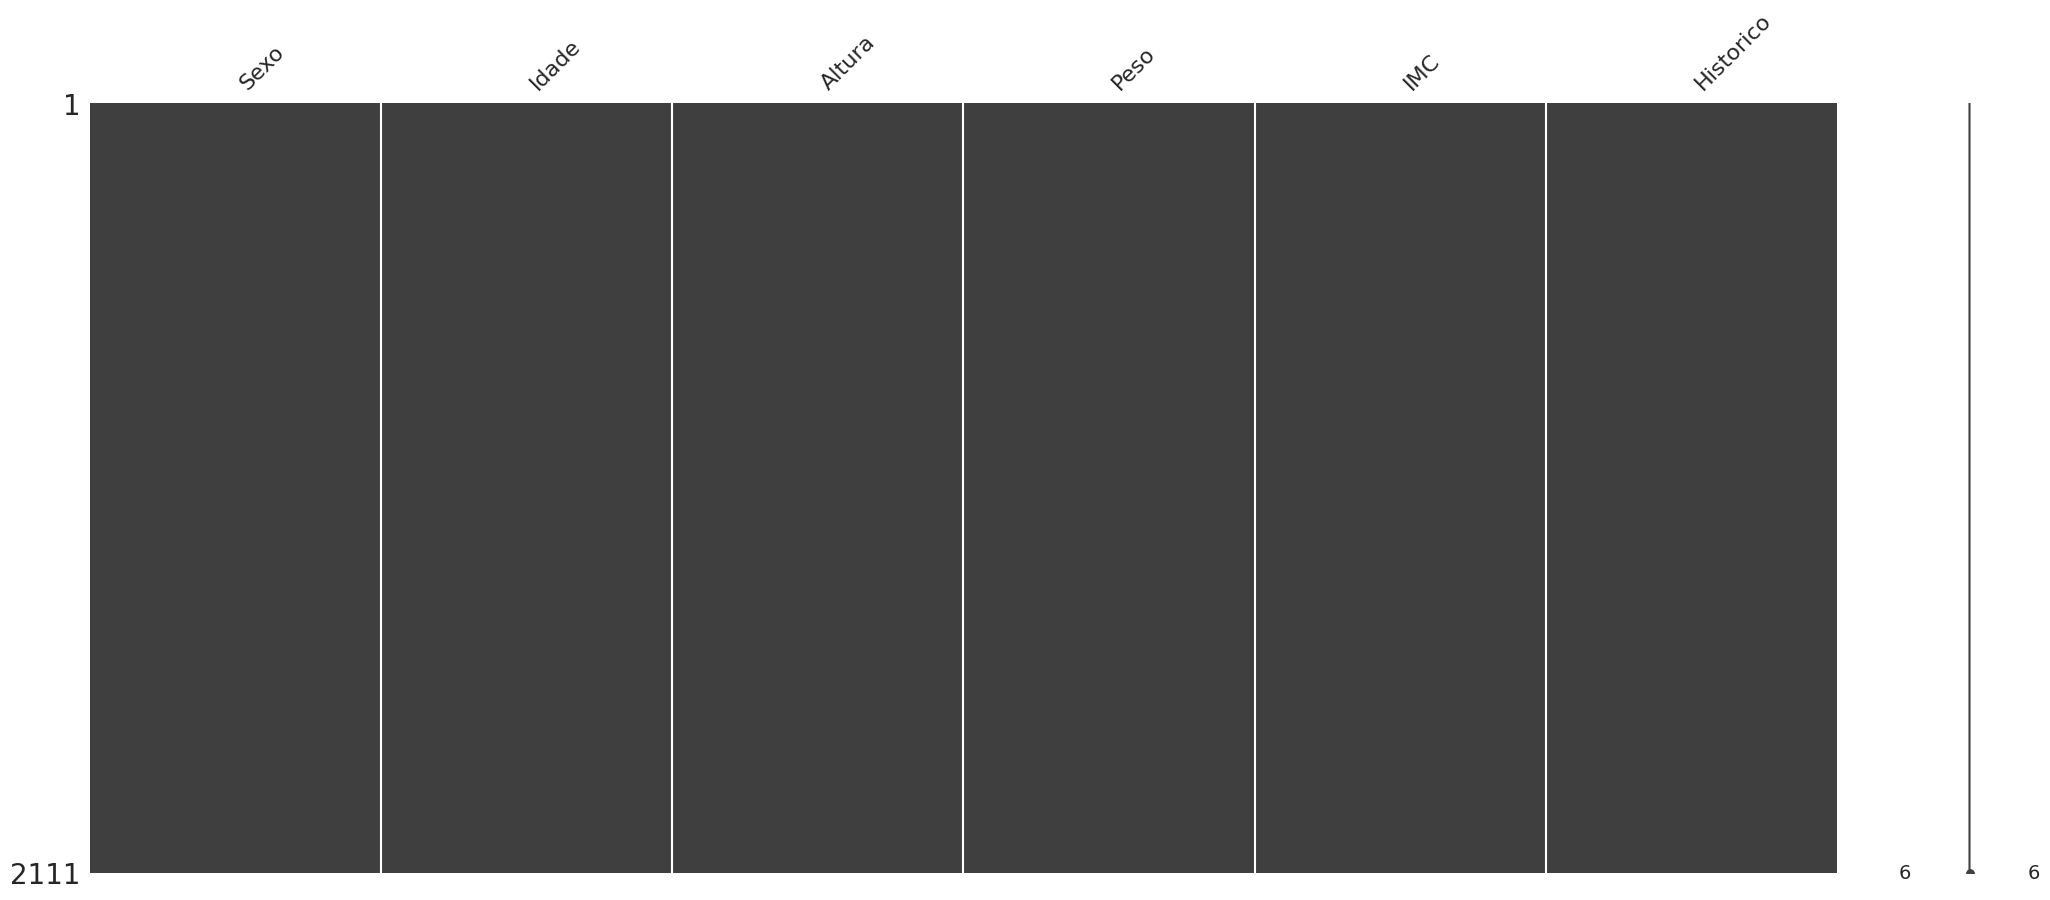

In [44]:
# salvando um NOVO dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(df2.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = df2[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

**5.4- Explique, passo a passo, as operações realizadas, justificando cada uma delas.** Se julgar necessário, utilizando os dados pré-processados, volte na etapa de análise exploratória e verifique se surge algum insight diferente após as operações realizadas.

In [45]:
# separanbo o target com categoricas numericas

def get_df2(text):
    classification = 0

    if text == "Insufficient_Weight":
        classification = 0
    elif text == "Normal_Weight":
        classification = 1
    elif text == "Overweight_Level_I":
        classification = 2
    elif text == "Overweight_Level_II":
        classification = 3
    elif text == "Obesity_Type_I":
        classification = 4
    elif text == "Obesity_Type_II":
        classification = 5
    else:
        classification = 6

    return classification
df2["classification"] = df2["Target"].apply(lambda label: get_df2(label))

df2.head(5)


,Sexo,Idade,Altura,Peso,IMC,Historico,Target,classification
0,1,21.0,1.62,64.0,24.386526,1,Normal_Weight,1
1,1,21.0,1.52,56.0,24.238227,1,Normal_Weight,1
2,2,23.0,1.80,77.0,23.765432,1,Normal_Weight,1
3,2,27.0,1.80,87.0,26.851852,0,Overweight_Level_I,2
4,2,22.0,1.78,89.8,28.342381,0,Overweight_Level_II,3


### **6-Modelo e Separação em conjunto de treino e conjunto de teste**

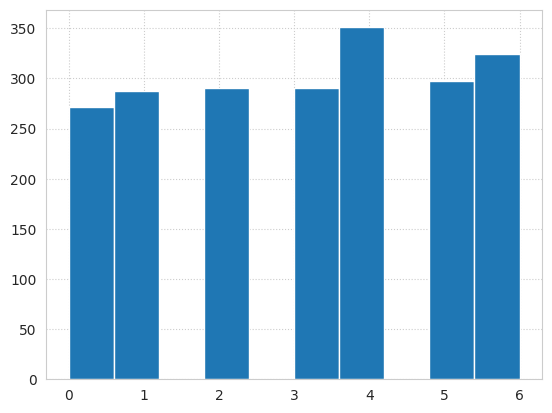

In [46]:
df2["classification"].hist()
plt.show()

In [47]:
X = df2[["Sexo",	"Idade","Altura","Peso","IMC"]]
y = df2["classification"]

print(X.shape)
print(y.shape)

(2111, 5)
(2111,)


In [48]:
#Polynomial features

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegressionCV

poly = PolynomialFeatures(2)
poly.fit(X)
poly_feats = pd.DataFrame(data=poly.transform(X), columns=poly.get_feature_names_out())
poly_feats = poly_feats.iloc[:, 1:]
print(poly_feats.shape)
poly_feats.head()

(2111, 20)


,Sexo,Idade,Altura,Peso,IMC,Sexo^2,Sexo Idade,Sexo Altura,Sexo Peso,Sexo IMC,Idade^2,Idade Altura,Idade Peso,Idade IMC,Altura^2,Altura Peso,Altura IMC,Peso^2,Peso IMC,IMC^2
0,1.0,21.0,1.62,64.0,24.386526,1.0,21.0,1.62,64.0,24.386526,441.0,34.02,1344.0,512.117055,2.6244,103.680,39.506173,4096.00,1560.737692,594.702672
1,1.0,21.0,1.52,56.0,24.238227,1.0,21.0,1.52,56.0,24.238227,441.0,31.92,1176.0,509.002770,2.3104,85.120,36.842105,3136.00,1357.340720,587.491655
2,2.0,23.0,1.80,77.0,23.765432,4.0,46.0,3.60,154.0,47.530864,529.0,41.40,1771.0,546.604938,3.2400,138.600,42.777778,5929.00,1829.938272,564.795763
3,2.0,27.0,1.80,87.0,26.851852,4.0,54.0,3.60,174.0,53.703704,729.0,48.60,2349.0,725.000000,3.2400,156.600,48.333333,7569.00,2336.111111,721.021948
4,2.0,22.0,1.78,89.8,28.342381,4.0,44.0,3.56,179.6,56.684762,484.0,39.16,1975.6,623.532382,3.1684,159.844,50.449438,8064.04,2545.145815,803.290561


In [49]:
poly_feats["classification"] = y

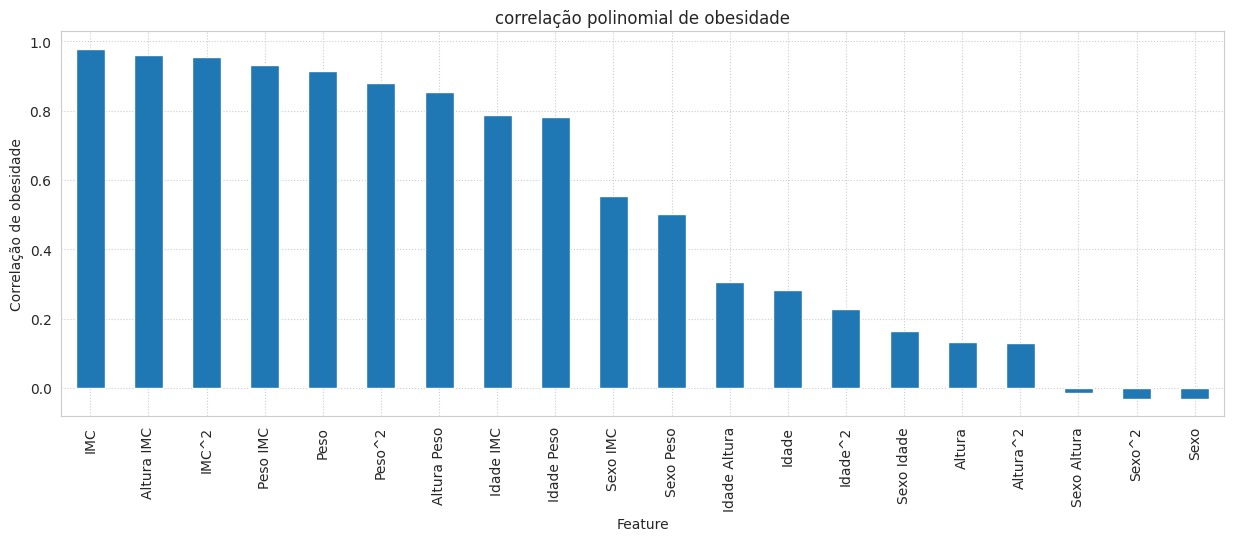

In [51]:
#Parece que a incorporação de recursos polinomiais produz alguns novos recursos com fortes correlações com a variável alvo.

target_corr = poly_feats.corr()["classification"]
target_corr = target_corr.sort_values(ascending=False)

plt.figure(figsize=(15, 5))
target_corr[1:].plot(kind="bar")
plt.xlabel("Feature")
plt.ylabel("Correlação de obesidade")
plt.title("correlação polinomial de obesidade")
plt.show()

In [52]:
# separação treino e teste 80% treino e 20% teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### **Logistic Regression**

In [53]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('preprocessor', PolynomialFeatures(degree=2)),
    ('estimator', LogisticRegressionCV(cv=5))
])

pipe.fit(X, y)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       0.95      0.98      0.97        57
           2       0.94      0.91      0.92        54
           3       0.93      0.97      0.95        69
           4       0.97      1.00      0.98        58
           5       1.00      0.96      0.98        54
           6       1.00      1.00      1.00        75

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



### **7-Conclusão**
O modelo alcançou uma acuracia de 97% na classificação de todas as classes do Target, tendo alcançado o objetivo do trabalho

